In [85]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [86]:
!curl -O https://maktabkhooneh.org/media/courses/projects/1632300362534233.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  185k  100  185k    0     0   489k      0 --:--:-- --:--:-- --:--:--  492k


In [87]:
df = pd.read_csv('1632300362534233.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [88]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [90]:
#لطفا دوبار این بلوک رو ران کنید
df = df[pd.to_numeric(df['Area'], errors='coerce').notnull()]
df['Area'] = df['Area'].astype('int')
df.dtypes

Area            int32
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [91]:
print(df.dtypes)
df.shape

Area            int32
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


(3473, 8)

In [92]:
df.dtypes

Area            int32
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

array([[<AxesSubplot: title={'center': 'Area'}>]], dtype=object)

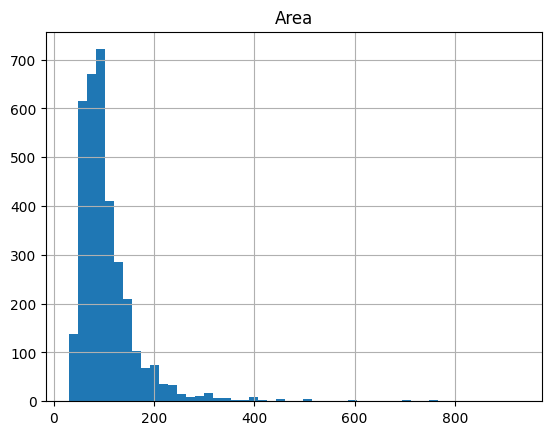

In [93]:
df.hist(column='Area', bins=50)

(3435, 8)


array([[<AxesSubplot: title={'center': 'Area'}>]], dtype=object)

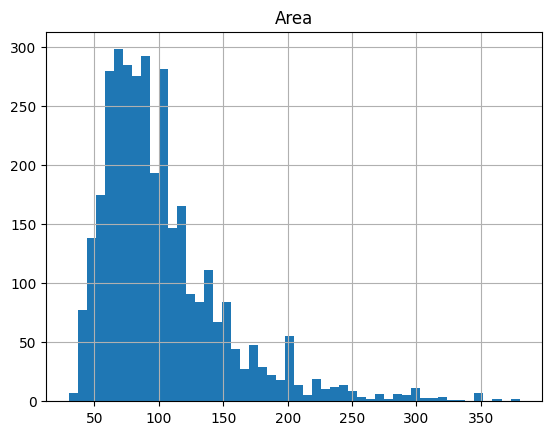

In [94]:
df.drop(df[df['Area'] >= 400].index, inplace = True)
print(df.shape)
df.hist(column='Area', bins=50)

In [95]:
from sklearn.preprocessing import LabelEncoder
encode_address = LabelEncoder()
df['Address'] = encode_address.fit_transform(df['Address'])
df['Address'].head()

0    154
1    154
2    115
3    150
4    148
Name: Address, dtype: int32

In [96]:
X = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator','Address' ]].values
print(df.dtypes)
X[0:5]

Area            int32
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address         int32
Price         float64
Price(USD)    float64
dtype: object


array([[63, 1, True, True, True, 154],
       [60, 1, True, True, True, 154],
       [79, 2, True, True, True, 115],
       [95, 2, True, True, True, 150],
       [123, 2, True, True, True, 148]], dtype=object)

In [97]:
Y = df[['Price' ]].values
print(df.dtypes)
Y[0:5]

Area            int32
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address         int32
Price         float64
Price(USD)    float64
dtype: object


array([[1.850e+09],
       [1.850e+09],
       [5.500e+08],
       [9.025e+08],
       [7.000e+09]])

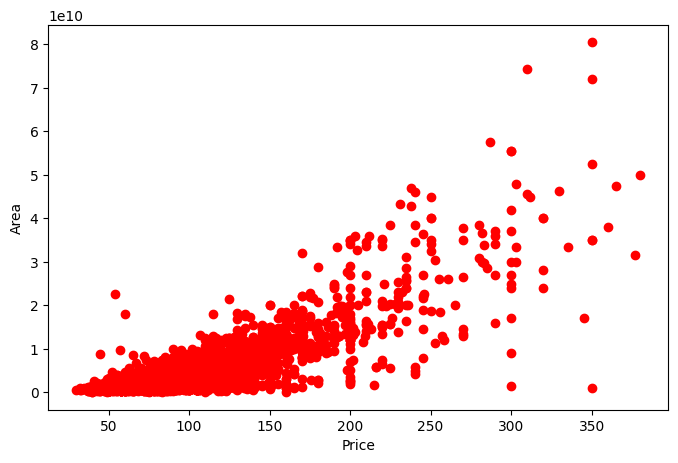

In [98]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Area"].values, df["Price"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Area')
plt.xlabel('Price')
plt.show()

In [99]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)
print ( X_train.shape,  Y_train.shape)
print ( X_test.shape,  Y_test.shape)

(2404, 6) (2404, 1)
(1031, 6) (1031, 1)


In [113]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, Y_train)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 6.11278030e+09 -1.18952625e+09  5.71574906e+07  1.25804272e+08
   1.37608834e+08 -8.14799443e+07]]


In [115]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test , y_hat) )

Mean absolute error: 2437740505.65
Residual sum of squares (MSE): 18327921826407135232.00
R2-score: 0.70
